# Model Evaluation & Improving | Lab

### Case Study: Customer Analysis

In [1]:
# Loading packages that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [2]:
# Loading data
ca_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
# Dividing numerical and categorical values
numerical = ca_df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [4]:
categorical = ca_df.select_dtypes(exclude=np.number)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [5]:
TT_RATIO = 0.3 # test/train
RAND_STATE = 34 # for reproducible shuffling

In [6]:
# Y/Y Split
X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount

In [7]:
# Train/ Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4
1898,2254,48978,65,7,95,0,1
10016,7427,28848,96,22,54,0,7


In [8]:
#Scaling
#StandardScaler
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the X_train
scaler.fit(X_train)

StandardScaler()

In [9]:
# Transform X_train using the scaler
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.46346294, -0.25942724, -0.94584075, ..., -0.5312763 ,
        -0.41717964,  2.48904378],
       [ 2.06300629,  1.14445607, -0.6531215 , ..., -0.45975825,
        -0.41717964, -0.40877285],
       [-0.23083148,  0.27515701, -0.30185841, ...,  0.07662717,
         1.82838733,  0.41917476],
       ...,
       [-0.7737813 ,  1.8700007 , -0.82875305, ..., -0.5312763 ,
        -0.41717964, -0.82274665],
       [-0.66361756, -1.16077475, -0.15549878, ..., -1.49677005,
         1.82838733, -0.82274665],
       [ 0.06217543,  1.93429916,  0.63484318, ..., -0.17368602,
        -0.41717964,  0.41917476]])

In [10]:
# Transform X_test using the scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.14444055, -0.71004053,  0.57629933, ..., -0.137927  ,
        -0.41717964,  2.48904378],
       [-0.52212155,  0.47663896,  0.51775548, ...,  0.54149453,
        -0.41717964, -0.82274665],
       [-0.51468192,  0.26713482,  0.48848355, ...,  0.5057355 ,
        -0.41717964, -0.82274665],
       ...,
       [-0.12567519,  1.43123929, -0.12622686, ...,  1.43547023,
        -0.41717964,  1.24712237],
       [-0.7420198 ,  0.78648094, -0.56530573, ...,  1.04212092,
         5.19673778, -0.82274665],
       [-0.80196604, -0.8159415 , -0.91656882, ..., -0.67431241,
        -0.41717964, -0.82274665]])

In [11]:
# Train model 
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression ()
model_lr.fit(X_train_scaled, y_train)
print(f'Coefficients: {model_lr.coef_}')
print(f'Intercept: {model_lr.intercept_}')

Coefficients: [-5.99598283e+00 -3.17043664e+01  1.87098365e+02  2.05563615e+00
 -6.47737048e-01 -5.95820844e-01 -1.54903758e-01]
Intercept: 435.8294573643411


In [12]:
# OLS Table
import statsmodels.api as sm
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant - Intercept # stats model = sm

model_OLS = sm.OLS(y_train, X_train_const_scaled).fit() 
predictions_train = model_OLS.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test_OLS = model_OLS.predict(X_test_const_scaled)
print_model_OLS = model_OLS.summary()
print(print_model_OLS) #test predictions are more relevant than test

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:16:56   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.0

In [13]:
# Predictions 
y_pred_2 = pd.DataFrame(model_lr.predict(X_test_scaled),columns = ['total_claim_amount'] )
print(y_pred_2)

      total_claim_amount
0             566.251066
1             521.336547
2             520.034026
3             311.491636
4             345.702660
...                  ...
3202          269.441500
3203          360.514344
3204          369.753270
3205          305.096416
3206          293.772305

[3207 rows x 1 columns]


In [14]:
y_pred_train_2 =  pd.DataFrame(model_lr.predict(X_train_scaled),columns = ['total_claim_amount'])
print(y_pred_train_2)

      total_claim_amount
0             269.035719
1             269.032999
2             371.807951
3             287.153998
4             481.845864
...                  ...
7477          476.680164
7478          543.694822
7479          226.415780
7480          446.280744
7481          492.777314

[7482 rows x 1 columns]


<b/> Error Metrics

In [15]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [16]:
print(f'Mean Square Errors (mse): {mse(y_test,y_pred_2)}')
print(f'Mean Absolut Errors (mae): {mae(y_test,y_pred_2)}')
print(f'Prediction on the train set: {mse(y_train,y_pred_train_2)}')

Mean Square Errors (mse): 52330.37932325502
Mean Absolut Errors (mae): 153.89185609233462
Prediction on the train set: 49747.15936894187


In [17]:
R2=r2_score(y_test,y_pred_2)
R2

0.39992389876814183

In [18]:
R2_test=model_lr.score(X_test_scaled,y_test)
R2_train=model_lr.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3986108219601946

<b/> Feature importance 

In [19]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs (model_lr.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.098365
1,income,31.704366
0,customer_lifetime_value,5.995983
3,months_since_last_claim,2.055636
4,months_since_policy_inception,0.647737
5,number_of_open_complaints,0.595821
6,number_of_policies,0.154904


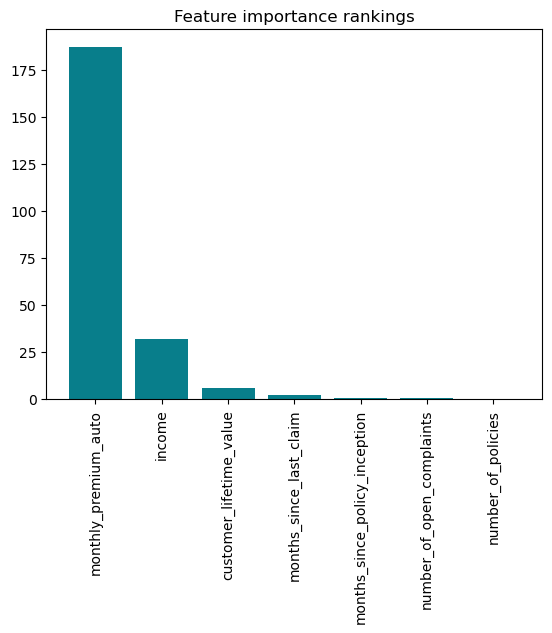

In [20]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title ('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

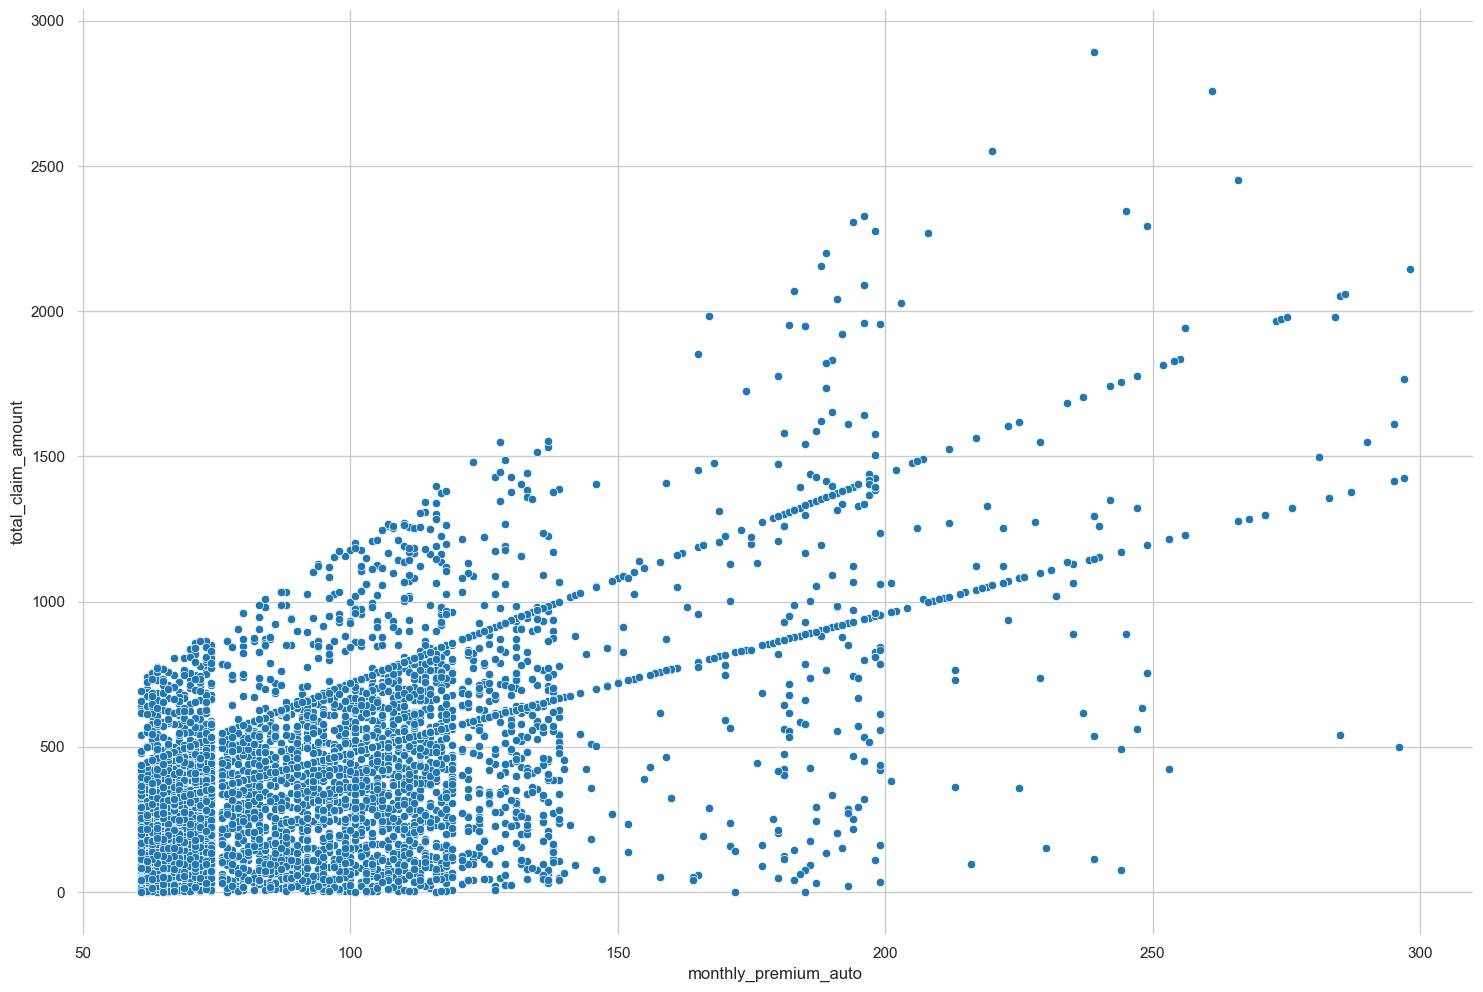

In [21]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="monthly_premium_auto", y="total_claim_amount", data=numerical, ax=ax)

### Label Encoding & Hot Encoding

In [22]:
# converting nominal values
dummies = pd.get_dummies(categorical, columns=['response', 'gender','month','sales_channel', 'region'], drop_first=True)
dummies

,coverage,education,effective_to_date,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size,response_yes,gender_m,month_jan,sales_channel_branch,sales_channel_call center,sales_channel_web,region_east,region_north west,region_west region
0,basic,college,2/18/11,employed,suburban,married,corporate auto,corporate l3,offer3,four-door car,medsize,0,1,0,0,0,0,0,0,0
1,basic,college,1/18/11,unemployed,suburban,single,personal auto,personal l3,offer4,four-door car,medsize,0,0,1,0,1,0,0,0,1
2,basic,bachelor,2/10/11,employed,suburban,single,personal auto,personal l3,offer3,suv,medsize,0,1,0,0,1,0,1,0,0
3,extended,college,1/11/11,employed,suburban,single,corporate auto,corporate l3,offer2,four-door car,medsize,1,1,1,1,0,0,0,1,0
4,premium,bachelor,1/17/11,medical leave,suburban,married,personal auto,personal l2,offer1,four-door car,medsize,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,unemployed,suburban,married,personal auto,personal l1,offer3,luxury car,medsize,0,0,1,0,0,1,0,0,0
10685,basic,college,1/6/11,employed,urban,married,personal auto,personal l3,offer2,four-door car,medsize,0,0,1,1,0,0,0,1,0
10686,extended,bachelor,2/6/11,employed,rural,married,corporate auto,corporate l3,offer1,luxury suv,medsize,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,employed,urban,divorced,personal auto,personal l1,offer1,suv,medsize,0,0,0,1,0,0,0,0,1


In [23]:
# converting ordinal values

# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
categorical['coverage']= label_encoder.fit_transform(categorical['coverage'])

In [24]:
# Define a dictionary of category to numerical label mappings
mapping = {'high school or below': 0, 'college': 1, 'bachelor': 2, 'master': 3,'doctor':4}

# Replace the categorical values with numerical labels using the replace() method
categorical['education'] = categorical['education'].replace(mapping)

In [25]:
m2 = {'unemployed': 0, 'disabled': 1, 'medical leave': 2, 'retired': 3,'employed':4}
categorical['employment_status'] = categorical['employment_status'].replace(m2)

In [26]:
m3 = {'rural': 0, 'suburban': 1, 'urban': 2}
categorical['location_code'] = categorical['location_code'].replace(m3)

In [27]:
m4 = {'divorced': 0, 'single': 1, 'married': 2}
categorical['marital_status'] = categorical['marital_status'].replace(m4)

In [28]:
m5 = {'offer1': 0, 'offer2': 1, 'offer3': 2, 'offer4':3}
categorical['renew_offer_type'] = categorical['renew_offer_type'].replace(m5)

In [29]:
categorical['sales_channel']= label_encoder.fit_transform(categorical['sales_channel'])
categorical['vehicle_class']= label_encoder.fit_transform(categorical['vehicle_class'])
categorical['policy']= label_encoder.fit_transform(categorical['policy'])

In [30]:
m6 = {'small': 0, 'medsize': 1, 'large': 2}
categorical['vehicle_size'] = categorical['vehicle_size'].replace(m6)

In [31]:
#Incluiding dummies into categorical
cat = pd.concat([categorical, dummies], axis = 1)
cat

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,vehicle_size,response_yes,gender_m,month_jan,sales_channel_branch,sales_channel_call center,sales_channel_web,region_east,region_north west,region_west region
0,central,no,0,1,2/18/11,feb,4,m,1,2,...,medsize,0,1,0,0,0,0,0,0,0
1,west region,no,0,1,1/18/11,jan,0,f,1,1,...,medsize,0,0,1,0,1,0,0,0,1
2,east,no,0,2,2/10/11,feb,4,m,1,1,...,medsize,0,1,0,0,1,0,1,0,0
3,north west,yes,1,1,1/11/11,jan,4,m,1,1,...,medsize,1,1,1,1,0,0,0,1,0
4,north west,no,2,2,1/17/11,jan,2,f,1,2,...,medsize,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,1/19/11,jan,0,f,1,2,...,medsize,0,0,1,0,0,1,0,0,0
10685,north west,no,0,1,1/6/11,jan,4,f,2,2,...,medsize,0,0,1,1,0,0,0,1,0
10686,central,no,1,2,2/6/11,feb,4,f,0,2,...,medsize,0,0,0,0,0,1,0,0,0
10687,west region,no,2,1,2/13/11,feb,4,f,2,0,...,medsize,0,0,0,1,0,0,0,0,1


In [32]:
#combining the 2 data sets 
df2 = pd.concat([cat, numerical], axis = 1)
df2.head(6)

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,region_north west,region_west region,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,central,no,0,1,2/18/11,feb,4,m,1,2,...,0,0,4809,48029,61,7,52,0,9,292
1,west region,no,0,1,1/18/11,jan,0,f,1,1,...,0,1,2228,92260,64,3,26,0,1,744
2,east,no,0,2,2/10/11,feb,4,m,1,1,...,0,0,14947,22139,100,34,31,0,2,480
3,north west,yes,1,1,1/11/11,jan,4,m,1,1,...,1,0,22332,49078,97,10,3,0,2,484
4,north west,no,2,2,1/17/11,jan,2,f,1,2,...,1,0,9025,23675,117,33,31,0,7,707
5,west region,yes,0,0,2/14/11,feb,4,m,1,0,...,0,1,4745,50549,61,2,73,0,7,292


In [33]:
# We will drop effective to date since it does not add value to the analysis
df3 = df2.drop('effective_to_date', axis = 1)
df3

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,...,region_north west,region_west region,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,central,no,0,1,feb,4,m,1,2,corporate auto,...,0,0,4809,48029,61,7,52,0,9,292
1,west region,no,0,1,jan,0,f,1,1,personal auto,...,0,1,2228,92260,64,3,26,0,1,744
2,east,no,0,2,feb,4,m,1,1,personal auto,...,0,0,14947,22139,100,34,31,0,2,480
3,north west,yes,1,1,jan,4,m,1,1,corporate auto,...,1,0,22332,49078,97,10,3,0,2,484
4,north west,no,2,2,jan,2,f,1,2,personal auto,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,jan,0,f,1,2,personal auto,...,0,0,15563,61541,253,12,40,0,7,1214
10685,north west,no,0,1,jan,4,f,2,2,personal auto,...,1,0,5259,61146,65,7,68,0,6,273
10686,central,no,1,2,feb,4,f,0,2,corporate auto,...,0,0,23893,39837,201,11,63,0,2,381
10687,west region,no,2,1,feb,4,f,2,0,personal auto,...,0,1,11971,64195,158,0,27,4,6,618


### Model

#### Y-y split & train and test split

In [34]:
# x-y split
X1 = df3.drop('total_claim_amount', axis=1)
y1 = df3.total_claim_amount

In [35]:
# train-test split 
from sklearn.model_selection import train_test_split 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split (X1, y1, test_size=0.3, random_state=100)
X_train_2 = pd.DataFrame(X_train_2)
X_test_2 = pd.DataFrame(X_test_2)

### Standardscaler on numericals

In [36]:
#Scaling
#StandardScaler
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the X_train
scaler.fit(X_train_2)

ValueError: could not convert string to float: 'central'

In [ ]:
# Transform X_train using the scaler
X_train_2_scaled = scaler.transform(X_train)
# Transform X_test using the scaler
X_test_2_scaled = scaler.transform(X_test)

In [ ]:
# Train model 
from sklearn.linear_model import LinearRegression
modelr = LinearRegression ()
modelr.fit(X_train_2_scaled, y_train_2)
print(f'Coefficients: {modelr.coef_}')
print(f'Intercept: {modelr.intercept_}')

### Visualisations

In [ ]:
# Predictions 
y_pred_2 = pd.DataFrame(modelr.predict(X_test_2_scaled),columns = ['total_claim_amount'] )
y_pred_train_2 =  pd.DataFrame(modelr.predict(X_train_2_scaled),columns = ['total_claim_amount'])

In [ ]:
# Scatterplot y_test, y_pred
plt.figure(figsize=(5,5))
plt.scatter(y_pred_2, y_pred_train_2, alpha = 0.2)